### Date preparation 

In [1]:
#Code done by ANN DOMINIC 
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv(r'C:\Users\Admin\Documents\Ann\JobApplications\utac\sales_forecast.csv')
df.head(30)

,Date,Sales
0,2022-01-01,10
1,2022-02-01,20
2,2022-03-01,15
3,2022-04-01,12
4,2022-05-01,13
5,2022-06-01,15
6,2022-07-01,12
7,2022-08-01,13
8,2022-09-01,14
9,2022-10-01,13


In [3]:
df.dtypes

Date     object
Sales     int64
dtype: object

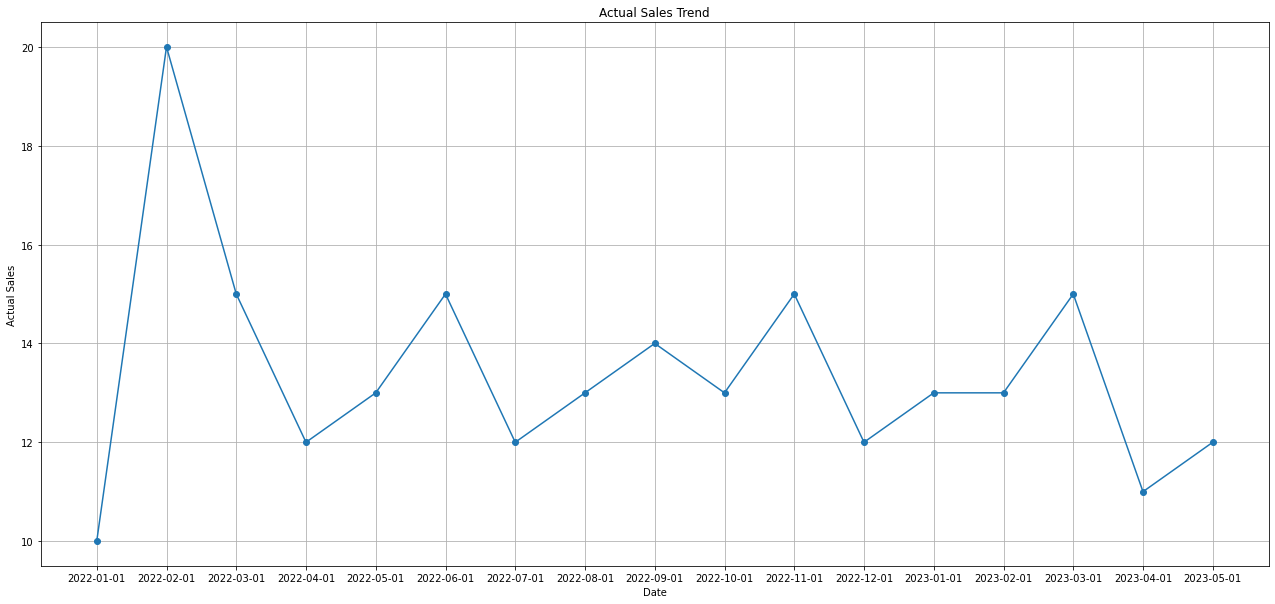

In [4]:
plt.figure(figsize=(22,10))
plt.plot(df.Date,df.Sales,marker='o')
plt.title("Actual Sales Trend")
plt.xlabel("Date")
plt.ylabel("Actual Sales")
plt.grid(True)
plt.show()

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [6]:
df['Date']

0    2022-01-01
1    2022-02-01
2    2022-03-01
3    2022-04-01
4    2022-05-01
5    2022-06-01
6    2022-07-01
7    2022-08-01
8    2022-09-01
9    2022-10-01
10   2022-11-01
11   2022-12-01
12   2023-01-01
13   2023-02-01
14   2023-03-01
15   2023-04-01
16   2023-05-01
Name: Date, dtype: datetime64[ns]

In [7]:
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

In [8]:
df.head(40)

,Sales
Date,
2022-01-01,10
2022-02-01,20
2022-03-01,15
2022-04-01,12
2022-05-01,13
2022-06-01,15
2022-07-01,12
2022-08-01,13
2022-09-01,14


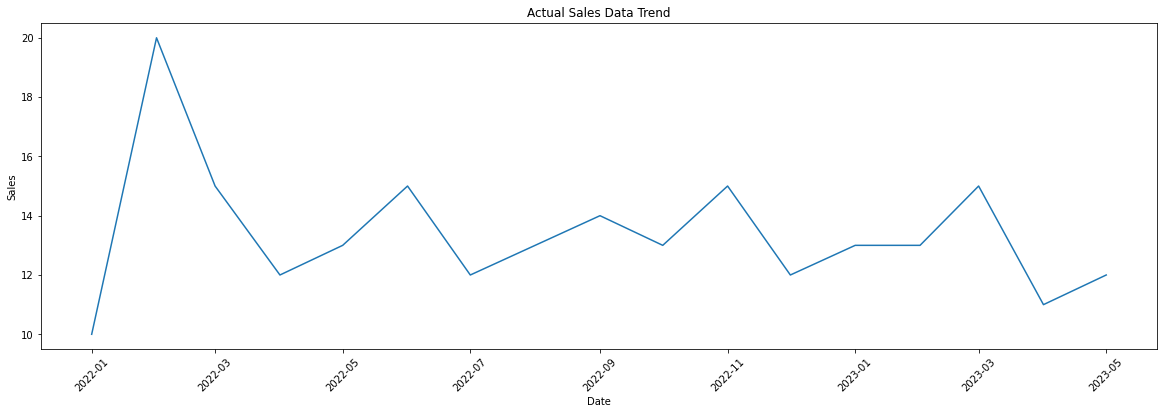

In [9]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales Data Trend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Check for Stationarity 
### Stationarity Check: Check for stationarity in the time series data. Stationarity means that the statistical properties of the time series, such as mean and variance, remain constant over time.

In [10]:
import statsmodels.api as sm

In [11]:
df.sort_index(inplace=True)

In [12]:
#decomposition =sm.tsa.seasonal_decompose(df,model='additive',freq=2, extrapolate_trend=2)
#fig = decomposition.plot()
#plt.show()

In [13]:
from statsmodels.tsa.seasonal import STL

In [14]:
# Decompose the time series using STL
decomposition = STL(df['Sales'], seasonal=13)
res = decomposition.fit()
trend = res.trend
seasonal = res.seasonal
residual = res.resid

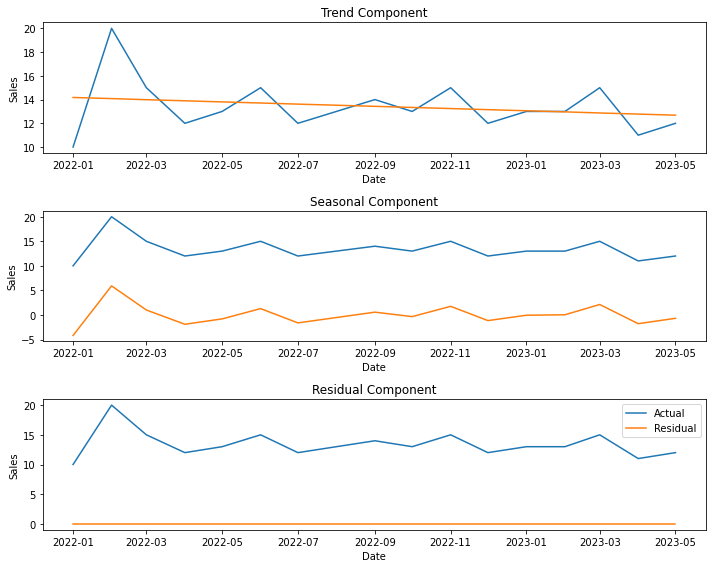

In [15]:
# Plot the decomposition components
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(trend.index, trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Trend Component')


plt.subplot(3, 1, 2)
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(seasonal.index, seasonal, label='Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Seasonal Component')


plt.subplot(3, 1, 3)
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(residual.index, residual, label='Residual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.legend()
plt.show()

### Apply statistical tests like Augmented Dickey-Fuller (ADF) test to determine stationarity.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
# Check for stationarity using ADF test
adf_result = adfuller(df['Sales'])
print("ADF Test p-value:", adf_result[1])
if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Test p-value: 7.0562826638906255e-06
The time series is stationary.


#### The ADF test is a statistical test that can be used to determine if a time series is stationary. If the p-value of the ADF test is less than 0.05, then the data is considered to be stationary.
#### For this data set pvalue is less than 0.05 so this is stationary

###  Perform train-test split


In [18]:
train_size = 0.8  # 80% of the data for training, 20% for testing
train = df[:int(len(df) * train_size)]
test = df[int(len(df) * train_size):]

### Build ARIMA model
### Fit the ARIMA model on the training data

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
model = ARIMA(train['Sales'], order=(1, 0, 0))
model_fit = model.fit()
import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
import warnings
warnings.filterwarnings("ignore")

### Forecast future sales on the testing data

In [22]:

forecast = model_fit.predict(start=len(train), end=len(df)-1)

In [23]:
forecast.head()

2023-02-01    13.938254
2023-03-01    13.620699
2023-04-01    13.728176
2023-05-01    13.691800
Freq: MS, Name: predicted_mean, dtype: float64

### Model Evaluation

#### To include model evaluation code for the time series forecast prediction
#### We can evaluate the forecast using mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# Evaluate the forecasted values
actual = test['Sales']
mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.6843829660483998
Mean Squared Error (MSE): 3.27198170556688
Root Mean Squared Error (RMSE): 1.8088619918520263


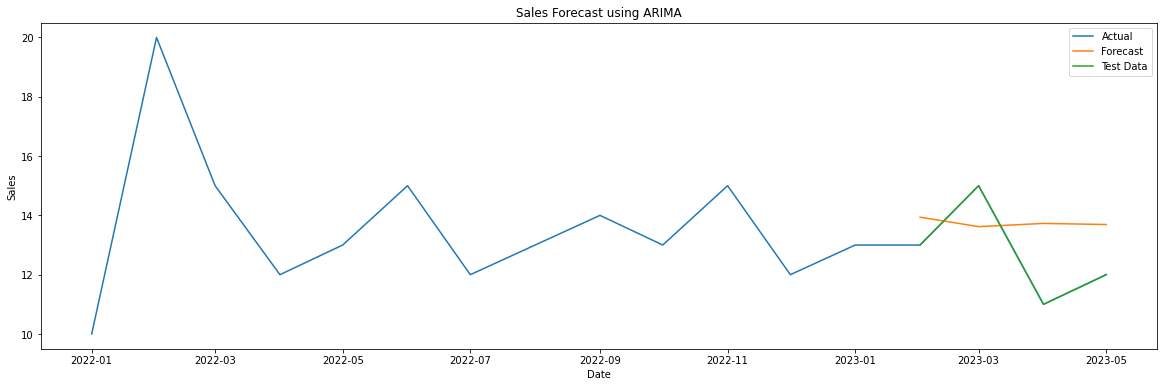

In [26]:
# Plot the actual sales, forecasted sales, and testing data
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.plot(test.index, test['Sales'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast using ARIMA')
plt.legend()
plt.show()

### Predict Future Data

In [27]:
#predict for next 11 months
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=11, freq='MS')
predict1 = model_fit.predict(start=len(df), end=len(df) + 10)

In [28]:
predict1.head(12)

2023-06-01    13.704112
2023-07-01    13.699945
2023-08-01    13.701355
2023-09-01    13.700878
2023-10-01    13.701039
2023-11-01    13.700985
2023-12-01    13.701003
2024-01-01    13.700997
2024-02-01    13.700999
2024-03-01    13.700998
2024-04-01    13.700999
Freq: MS, Name: predicted_mean, dtype: float64

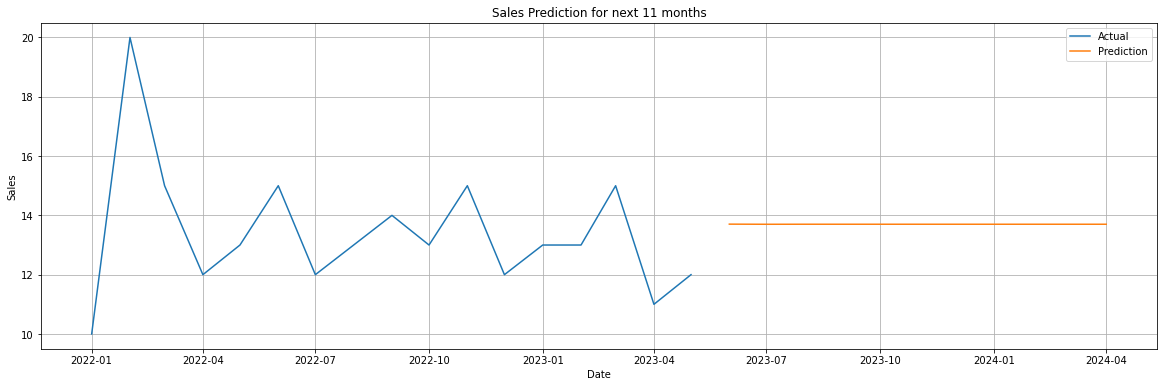

In [29]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(future_dates, predict1, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction for next 11 months')
plt.legend()
plt.grid(True)
plt.show()

### Predicted values in the time series forecast with ARIMA is flat 
#### ARIMA model is producing flat predictions for your time series sales data, you can try using the Facebook Prophet model. Prophet is a robust time series forecasting model that can handle various trends, seasonality, and holiday effects. It is particularly effective for data with multiple seasonality patterns.

In [30]:
from prophet import Prophet

In [31]:
df1 =pd.read_csv(r'C:\Users\Admin\Documents\Ann\JobApplications\utac\sales_forecast.csv')
df.head(30)

,Sales
Date,
2022-01-01,10
2022-02-01,20
2022-03-01,15
2022-04-01,12
2022-05-01,13
2022-06-01,15
2022-07-01,12
2022-08-01,13
2022-09-01,14


In [32]:
# Convert 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

In [33]:
# Prepare the data for Prophet model
prophet_data = pd.DataFrame({'ds': df1['Date'], 'y': df1['Sales']})


In [34]:
# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Create future dates for the forecast
future = model.make_future_dataframe(periods=11, freq='M')

In [36]:
# Forecast future sales
forecast = model.predict(future)

In [37]:
# Select only the relevant columns for the forecasted data
forecasted_data = forecast[['ds', 'yhat']].tail(11)

# Print the forecasted data
print(forecasted_data)

           ds       yhat
17 2023-05-31  12.407349
18 2023-06-30  12.299036
19 2023-07-31  12.187113
20 2023-08-31  12.075190
21 2023-09-30  11.966877
22 2023-10-31  11.854954
23 2023-11-30  11.746641
24 2023-12-31  11.634717
25 2024-01-31  11.522794
26 2024-02-29  11.418092
27 2024-03-31  11.306168


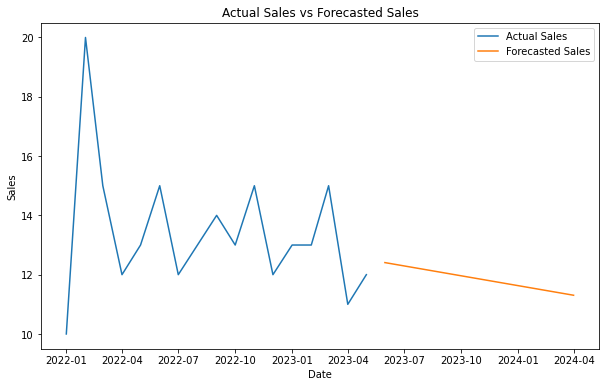

In [38]:
 #Plot the actual sales data and the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df1['Date'], df1['Sales'], label='Actual Sales')
plt.plot(forecasted_data['ds'], forecasted_data['yhat'], label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs Forecasted Sales')
plt.legend()
plt.show()